In [1]:
import numpy as np 
import pandas as pd 
import sklearn as sk 
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Chargement des données

In [35]:
#data = pd.read_csv('full_set_complete.csv').drop(columns=['Index'])
data = pd.read_csv('full_set_complete.csv').drop(columns=['Index'])
Y_train= pd.read_csv('y_train_lXj6X5y.csv',index_col=0)
X_train= pd.read_csv('X_train_6ZIKlTY.csv', index_col=0)
X_test= pd.read_csv('X_test_oiZ2ukx.csv',index_col=0)
X_test.index = X_test.index + X_train.shape[0]  # Décale les index de X_test
data.head()

,patient_id,cohort,sexM,gene,age_at_diagnosis,age,ledd,time_since_intake_on,time_since_intake_off,on,off
0,3332,0,0,1,48.5,52.1,607.0,1.9,14.779592,7.0,38.620296
1,3332,0,0,1,48.5,53.0,666.0,1.9,17.600000,12.0,44.000000
2,3332,0,0,1,48.5,53.9,717.0,1.2,14.878328,6.0,39.662327
3,3332,0,0,1,48.5,54.8,770.0,1.5,14.727947,11.0,40.183342
4,3332,0,0,1,48.5,56.9,885.0,0.3,14.326257,24.0,41.399048


In [36]:
import pandas as pd
import re

# Charger le CSV
df_embeddings = pd.read_csv("patient_embeddings.csv")

# Renommer 'patient_id' en 'feature_mystere'
df_embeddings = df_embeddings.rename(columns={'patient_id': 'feature_mystere'})

# Déplacer l'index en colonne 'patient_id'
df_embeddings.reset_index(inplace=True)
df_embeddings = df_embeddings.rename(columns={'index': 'patient_id'})

# 🔥 Correction du parsing
def parse_embedding(embedding_str):
    try:
        # Suppression des crochets et séparation des nombres (corrige le problème d'espace)
        embedding_list = [float(x) for x in re.split(r'\s+', embedding_str.strip("[]")) if x]
        
        # Vérifier que l'embedding a bien 80 dimensions
        if len(embedding_list) == 80:
            return embedding_list
        else:
            return None  # On ignore les lignes avec un format incorrect
    except ValueError:
        return None

# Appliquer la conversion
df_embeddings['embedding'] = df_embeddings['embedding'].apply(parse_embedding)



# Convertir les embeddings en colonnes séparées
embedding_columns = pd.DataFrame(df_embeddings['embedding'].to_list(), 
                                 columns=[f"embedding_{i}" for i in range(80)])

# Fusionner avec df_embeddings
df_embeddings = pd.concat([df_embeddings.drop(columns=['embedding']), embedding_columns], axis=1)

# Sauvegarde du fichier propre
#df_embeddings.to_csv("patient_embeddings_cleaned.csv", index=False)

print("✅ Embeddings correctement formatés et sauvegardés.")
df_embeddings.head()



✅ Embeddings correctement formatés et sauvegardés.


,patient_id,feature_mystere,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,...,embedding_70,embedding_71,embedding_72,embedding_73,embedding_74,embedding_75,embedding_76,embedding_77,embedding_78,embedding_79
0,0,-0.349128,2.005290,-0.169963,-0.052554,0.110405,10.920119,-9.473660,8.746132,0.039700,...,0.078690,0.989081,1.687204,0.169722,0.249367,-0.541266,-1.446703,1.619573,1.180389,-0.032391
1,1,2.864282,2.021763,-0.076229,-0.090080,0.094190,10.722602,-9.378027,8.567398,0.066346,...,0.028699,0.825209,0.215251,-0.456487,1.035434,0.011803,-0.103688,-0.272007,1.079059,-0.872258
2,2,-0.349128,1.984607,-0.182438,-0.053790,0.109745,10.776217,-9.363618,8.632795,0.061065,...,-0.014155,0.472843,1.284738,0.544267,0.064541,-0.405584,0.287365,0.668633,0.794449,-0.621726
3,3,2.864282,1.938959,-0.087737,-0.069152,0.073783,10.269564,-8.996756,8.197000,0.060894,...,0.325086,0.512594,1.287632,-0.401082,0.290231,-0.771859,0.228390,0.484204,1.173335,0.133966
4,4,-0.349128,2.017550,-0.172780,-0.051880,0.105828,10.981655,-9.540340,8.797442,0.044009,...,-0.094508,1.009396,1.524287,0.790728,0.204609,0.127855,-1.380060,1.116864,0.930149,-0.781250


In [37]:
data = data.merge(df_embeddings, on="patient_id", how="left") 
data


,patient_id,cohort,sexM,gene,age_at_diagnosis,age,ledd,time_since_intake_on,time_since_intake_off,on,...,embedding_70,embedding_71,embedding_72,embedding_73,embedding_74,embedding_75,embedding_76,embedding_77,embedding_78,embedding_79
0,3332,0,0,1,48.5,52.1,607.0000,1.9,14.779592,7.0,...,0.043822,0.991469,1.679585,0.756045,-0.099165,-0.817015,1.827981,-0.190472,0.844687,-0.744678
1,3332,0,0,1,48.5,53.0,666.0000,1.9,17.600000,12.0,...,0.043822,0.991469,1.679585,0.756045,-0.099165,-0.817015,1.827981,-0.190472,0.844687,-0.744678
2,3332,0,0,1,48.5,53.9,717.0000,1.2,14.878328,6.0,...,0.043822,0.991469,1.679585,0.756045,-0.099165,-0.817015,1.827981,-0.190472,0.844687,-0.744678
3,3332,0,0,1,48.5,54.8,770.0000,1.5,14.727947,11.0,...,0.043822,0.991469,1.679585,0.756045,-0.099165,-0.817015,1.827981,-0.190472,0.844687,-0.744678
4,3332,0,0,1,48.5,56.9,885.0000,0.3,14.326257,24.0,...,0.043822,0.991469,1.679585,0.756045,-0.099165,-0.817015,1.827981,-0.190472,0.844687,-0.744678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79270,1624,0,1,2,61.9,70.4,755.5196,1.1,16.000000,17.0,...,0.290971,0.026446,1.471600,0.416798,0.288764,-1.258945,1.548100,0.385052,1.293336,-0.441428
79271,1624,0,1,2,61.9,71.3,800.0000,1.0,13.817251,32.0,...,0.290971,0.026446,1.471600,0.416798,0.288764,-1.258945,1.548100,0.385052,1.293336,-0.441428
79272,1624,0,1,2,61.9,73.6,935.0000,0.5,13.437717,44.0,...,0.290971,0.026446,1.471600,0.416798,0.288764,-1.258945,1.548100,0.385052,1.293336,-0.441428
79273,1624,0,1,2,61.9,74.5,988.0000,3.4,13.700000,23.0,...,0.290971,0.026446,1.471600,0.416798,0.288764,-1.258945,1.548100,0.385052,1.293336,-0.441428


In [8]:
df_embeddings = pd.read_csv("patient_embeddings.csv")
df_embeddings

,patient_id,embedding
0,-0.349128,[ 2.0052898e+00 -1.6996270e-01 -5.2553855e-02 ...
1,2.864282,[ 2.02176332e+00 -7.62289986e-02 -9.00800526e-...
2,-0.349128,[ 1.9846069 -0.18243751 -0.05378966 0.109744...
3,2.864282,[ 1.9389590e+00 -8.7737262e-02 -6.9152385e-02 ...
4,-0.349128,[ 2.0175498 -0.17277992 -0.05188039 0.105828...
...,...,...
9954,2.864282,[ 2.0239627e+00 -7.7318534e-02 -9.0283066e-02 ...
9955,-0.349128,[ 2.0784881e+00 -1.9703099e-01 -8.6973235e-03 ...
9956,2.864282,[ 1.98272610e+00 -5.68896234e-02 -8.64763558e-...
9957,-0.349128,[ 2.00584292e+00 -1.75449401e-01 -4.68129665e-...


## Feature engineering

In [39]:
# Catégorisation en entiers
cat_features = ['cohort', 'sexM', 'gene']

# Pairwise interactions categorielles
for f1, f2 in combinations(cat_features, 2):
    data[f"{f1}_{f2}_interaction"] = data[f1] * 10 + data[f2]  # ou data[f1].astype(str) + "_" + data[f2].astype(str)


X_train_filled = data.loc[X_train.index]
Y_train = Y_train

X_train_train, X_valid, y_train_train, y_valid = train_test_split(X_train_filled, Y_train, test_size=0.2, random_state=42)

In [8]:
X_train_filled = data.loc[X_train.index]
Y_train = Y_train

# Pour la sélection de modèles
X_train_train, X_valid, y_train_train, y_valid = train_test_split(X_train_filled, Y_train, test_size=0.2, random_state=42)

# Pour la soumission
X_test_full = data.loc[X_test.index]

In [41]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_train, y_train_train)


y_pred = model.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
print(f"Mean Squared Error sur le set de validation : {mse}")

c:\Users\soelm\Documents\04_Code\MVA\MVA_venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error sur le set de validation : 42.6601239437101


C:\Users\soelm\AppData\Local\Temp\ipykernel_37116\701310133.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')


Text(0, 0.5, 'Features')

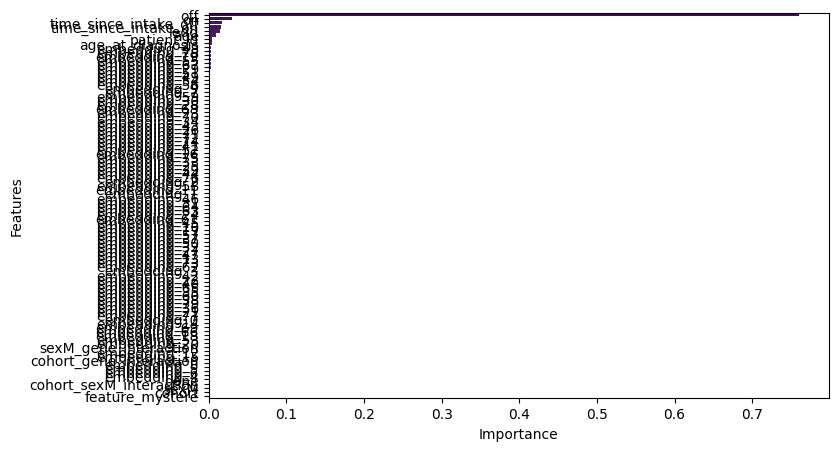

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extraire l'importance des features
feature_importance = model.feature_importances_

# Créer un DataFrame pour trier et visualiser
importance_df = pd.DataFrame({'Feature': X_train_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher les valeurs
#print(importance_df)

# Visualisation avec un barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Features')
